<a href="https://colab.research.google.com/github/achmfirmansyah/Teaching_Links/blob/master/ICST2020/03_rASTER_VISUALIZES_ANDZONAL_STATISTIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
import rasterio
from rasterio.plot import show
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

     |████████████████████████████████| 18.2MB 229kB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
for i in ['jabodetabek','mebidangro','kedungsepur','maminasata','gerbangkertasusila','bandungraya']:
  dataset = rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/compiled_GHSL_30_train_2014_'+i+'.tif','r')
  lse_data=pd.DataFrame(np.array(dataset.read(2).flatten())).rename(columns={0:'NDVI'})
  lse_data['LSE_der_landsat7']=lse_data.NDVI.apply(lambda y: 0.995 if y < -0.185 else (
    0.970 if y< 0.157 else (1.0098+0.047*np.log(y) if y<0.727 else 0.990)))
  data_LSE=lse_data[['LSE_der_landsat7']].values.reshape(dataset.read(3).shape[0],dataset.read(3).shape[1]).astype(np.float64)
  profile = dataset.profile
  profile.update(
        dtype=data_LSE.dtype,
        count=1,
        compress='lzw')
  with rasterio.open(
    '/content/gdrive/My Drive/Urban_monitoring/Urban_/LSE_compiled_GHSL_30_train_2014_'+i+'.tif','w',**profile) as dst2:
    dst2.write(data_LSE,1)
    dst2.close()

In [ ]:
for i in ['jabodetabek','mebidangro','kedungsepur','maminasata','gerbangkertasusila','bandungraya']:
  dataset = rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/compiled_GHSL_30_train_2014_'+i+'.tif','r')
  u_class_data=pd.DataFrame(np.array(dataset.read(1).flatten())).rename(columns={0:'BU_class'})
  u_class_data['U_class']=u_class_data.BU_class.apply(lambda y: 1 if y>=3 else 0)
  u_class_data=u_class_data[['U_class']].values.reshape(dataset.read(3).shape[0],dataset.read(3).shape[1]).astype(np.uint8)
  profile = dataset.profile
  profile.update(
        dtype=u_class_data.dtype,
        count=1,
        compress='lzw')
  with rasterio.open(
    '/content/gdrive/My Drive/Urban_monitoring/Urban_/u_class_compiled_GHSL_30_train_2014_'+i+'.tif','w',**profile) as dst2:
    dst2.write(u_class_data,1)
    dst2.close()

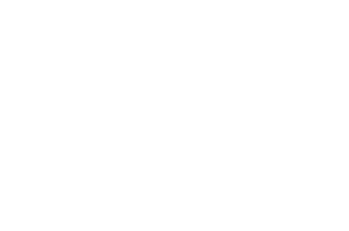

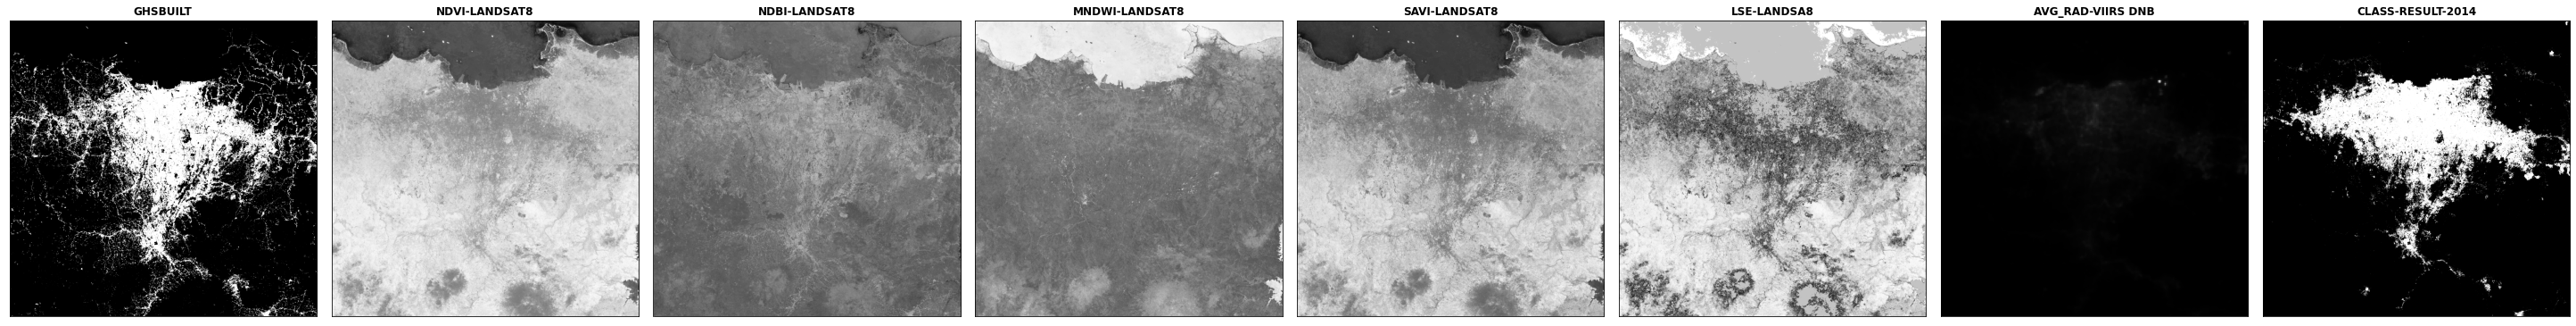

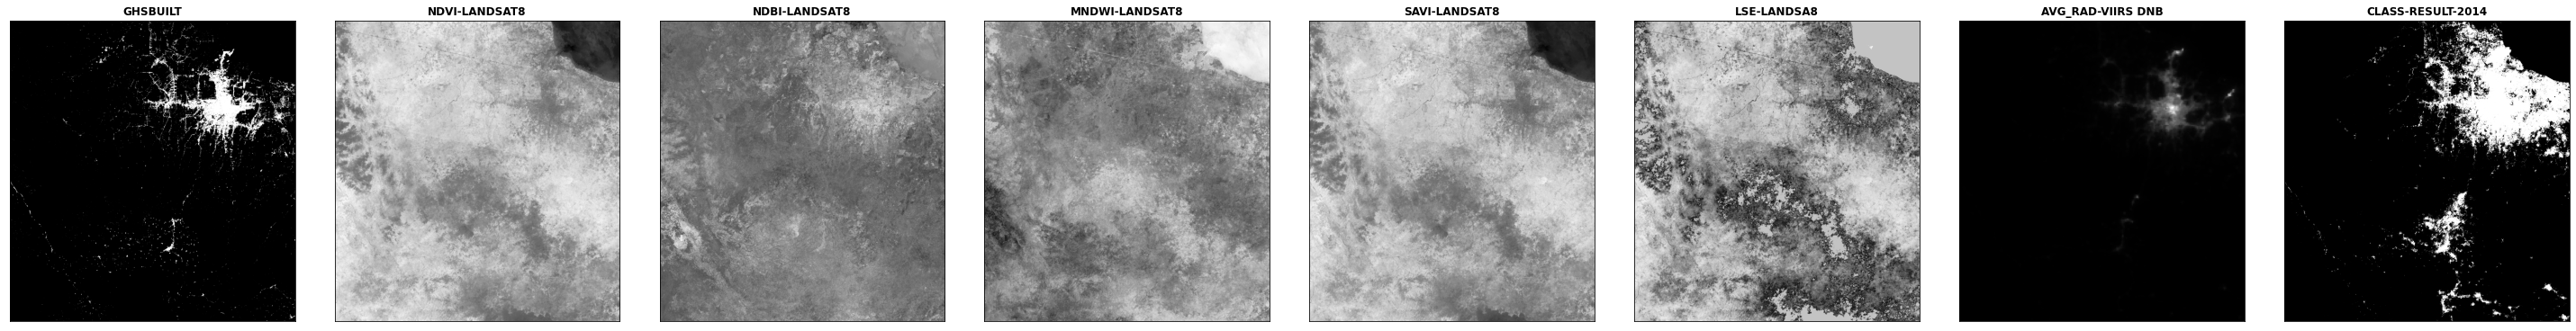

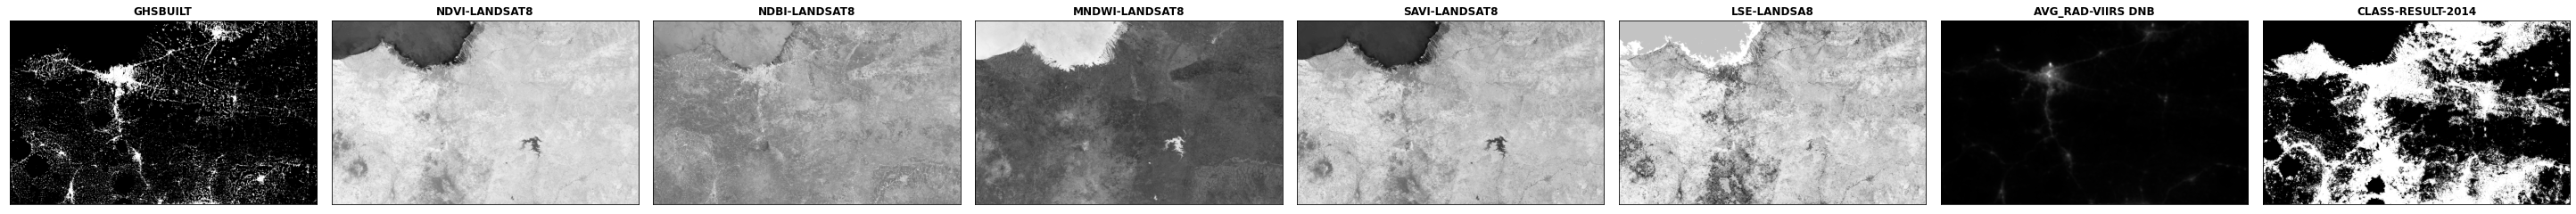

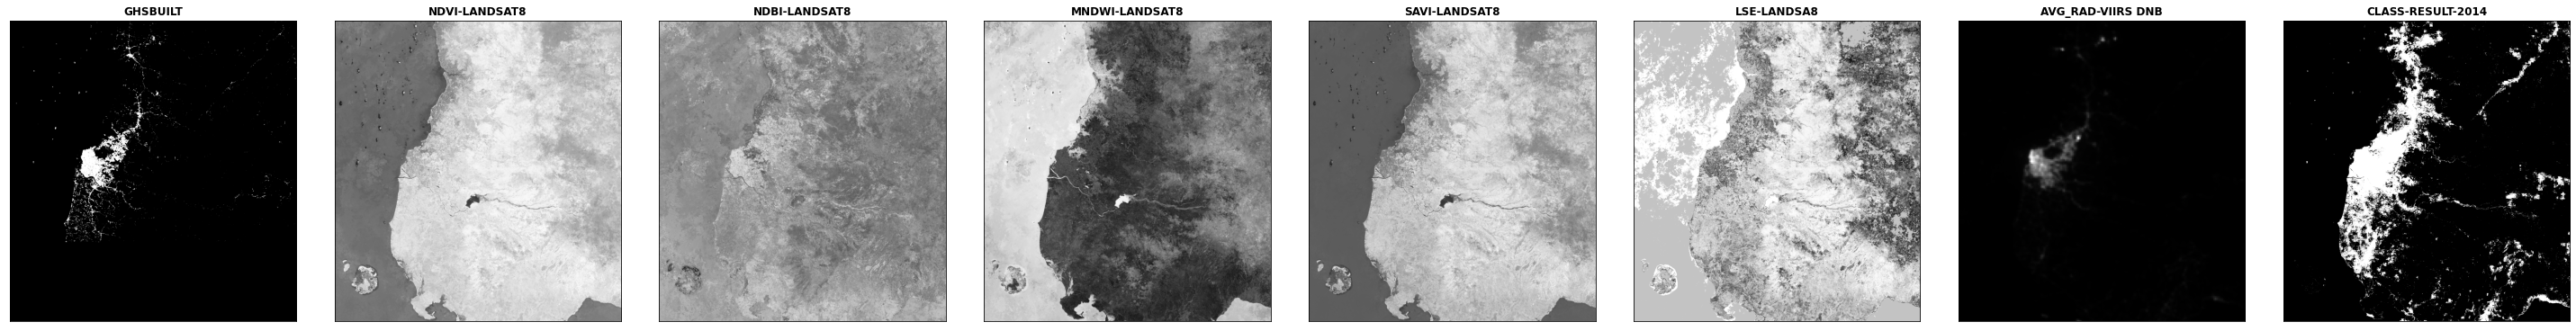

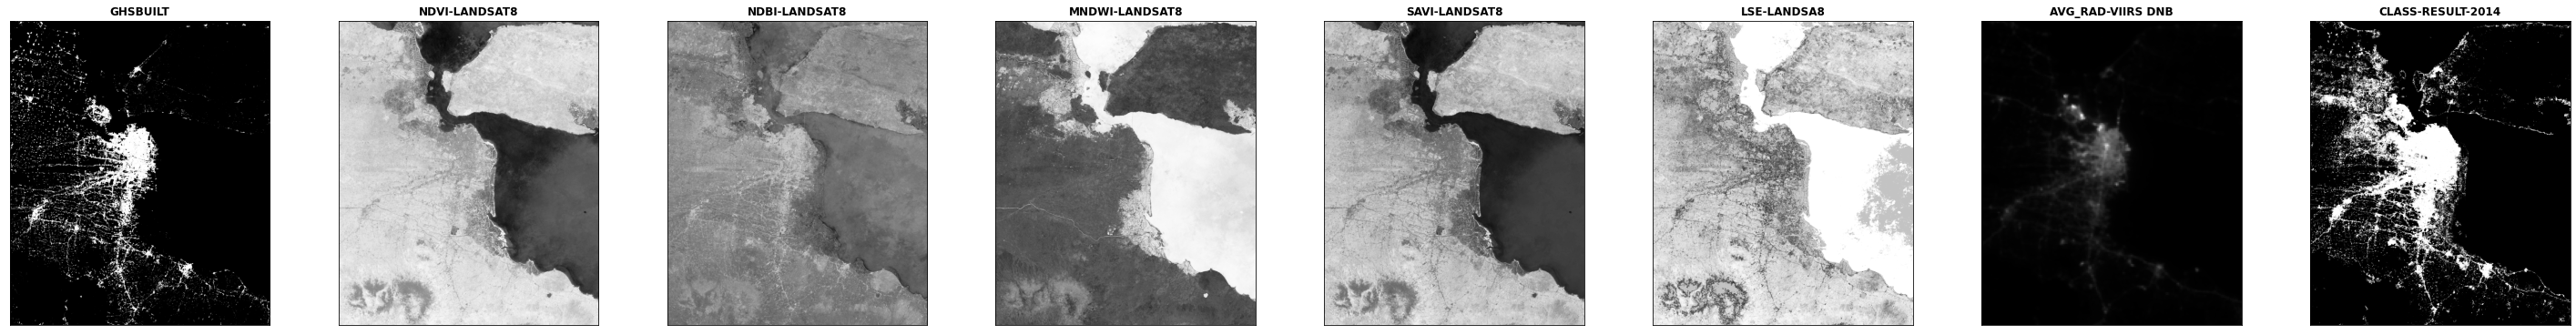

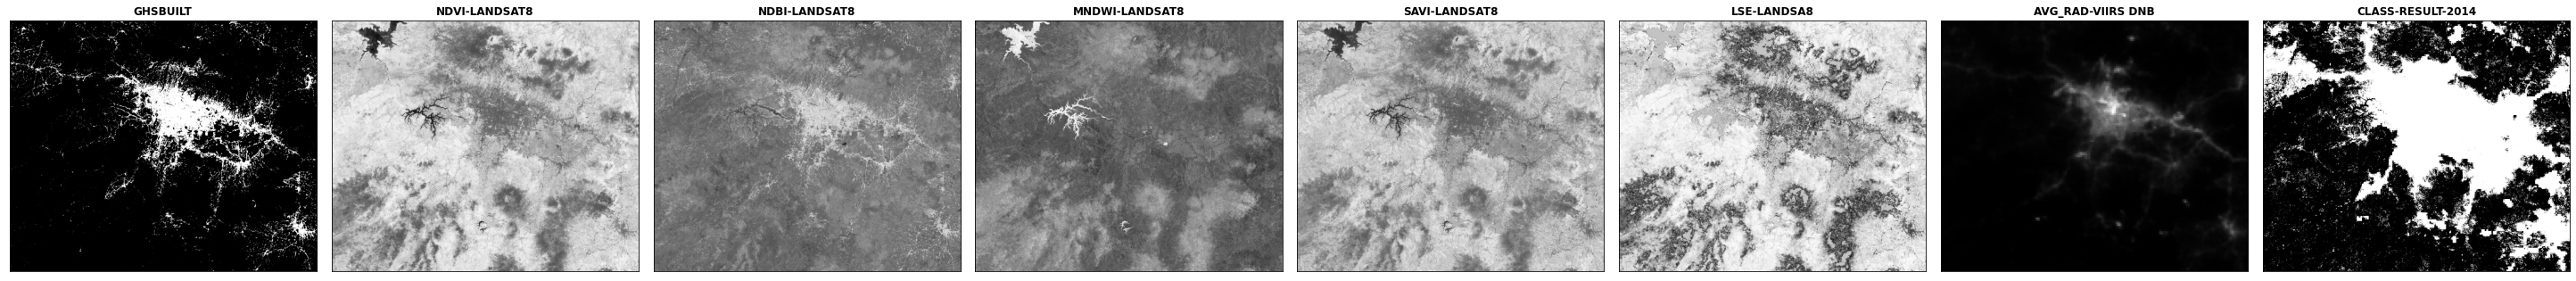

In [ ]:

#Jabodetabek
plt.axis('off')
for i in ['jabodetabek','mebidangro','kedungsepur','maminasata','gerbangkertasusila','bandungraya']:
  dataset = rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/compiled_GHSL_30_train_2014_'+i+'.tif','r')
  u_class= rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/u_class_compiled_GHSL_30_train_2014_'+i+'.tif','r')
  lse_= rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/LSE_compiled_GHSL_30_train_2014_'+i+'.tif','r')
  class_2014_= rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/rev_class_2014_'+i+'.tif','r')
  fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1, 8, constrained_layout=True,figsize=(40,5))
  show((u_class),cmap='Greys_r',ax=ax1,title='GHSBUILT')
  show((dataset,2),cmap='Greys_r',ax=ax2,title='NDVI-LANDSAT8')
  show((dataset,3),cmap='Greys_r',ax=ax3,title='NDBI-LANDSAT8')
  show((dataset,4),cmap='Greys_r', ax=ax4,title='MNDWI-LANDSAT8')
  show((dataset,5),cmap='Greys_r',ax=ax5,title='SAVI-LANDSAT8')
  show(lse_,cmap='Greys_r',ax=ax6,title='LSE-LANDSA8')
  show((dataset,7),cmap='Greys_r',ax=ax7,title='AVG_RAD-VIIRS DNB')
  show(class_2014_,cmap='Greys_r',ax=ax8,title='CLASS-RESULT-2014')
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax2.set_xticks([])
  ax2.set_yticks([])
  ax3.set_xticks([])
  ax3.set_yticks([])
  ax4.set_xticks([])
  ax4.set_yticks([])
  ax5.set_xticks([])
  ax5.set_yticks([])
  ax6.set_xticks([])
  ax6.set_yticks([])
  ax7.set_xticks([])
  ax7.set_yticks([])
  ax8.set_xticks([])
  ax8.set_yticks([])
  fig.savefig('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/class_result_fig2_'+i+'.png')

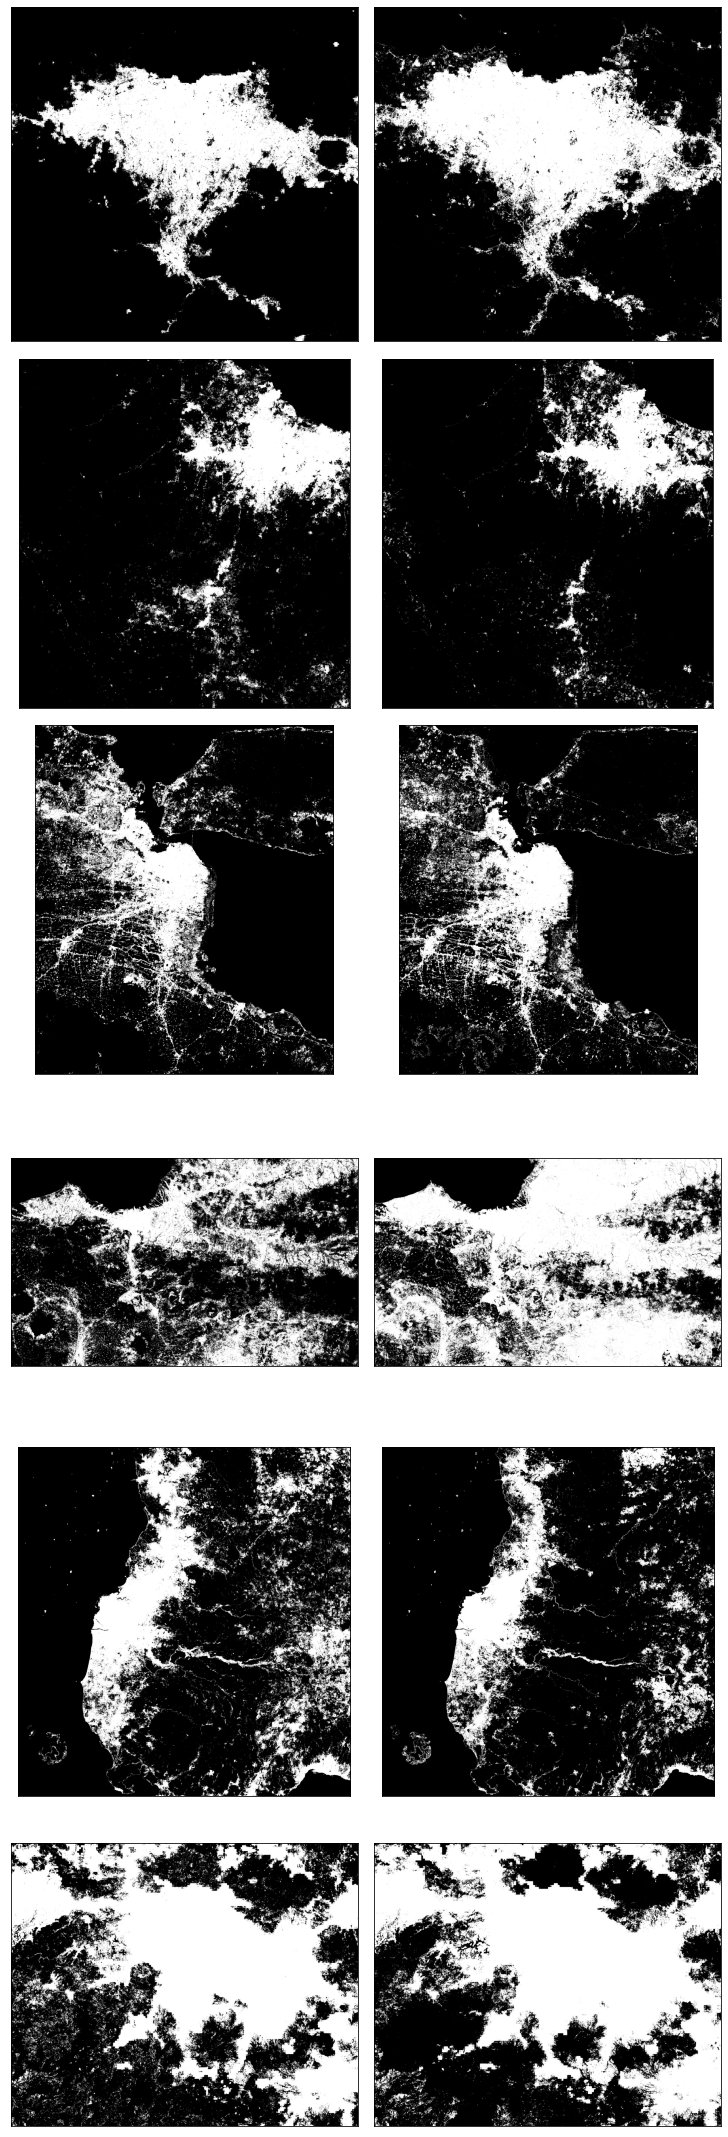

In [ ]:
fig,ax=plt.subplots(6,2,constrained_layout=True,figsize=(10,30))
ix=0
for i in ['2015','2019']:
  iy=0
  for j in ['jabodetabek','mebidangro','gerbangkertasusila','kedungsepur','maminasata','bandungraya']:
    class_= rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/rev_class_'+i+'_'+j+'.tif','r')
    show((class_),cmap='Greys_r',ax=ax[iy,ix])
    ax[iy,ix].set_xticks([])
    ax[iy,ix].set_yticks([])
    iy=iy+1
  ix=ix+1
fig.savefig('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/class_result_fig3_2015_2019__.png')

In [ ]:
#change of built up
for i in ['jabodetabek','mebidangro','gerbangkertasusila','kedungsepur','maminasata','bandungraya']:
  dataset_2015 = rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/rev_class_2015_'+i+'.tif','r')
  dataset_2019 = rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/rev_class_2019_'+i+'.tif','r')
  y=np.array(dataset_2015.read(1)).astype(np.int16)-np.array(dataset_2019.read(1)).astype(np.int16)
  profile = dataset_2015.profile
  profile.update(
        dtype=y.dtype,
        count=1,
        compress='lzw')
  with rasterio.open(
    '/content/gdrive/My Drive/Urban_monitoring/Urban_//GHSL_/GHSL_rev/oke/fig4_changes_'+i+'.tif','w',**profile) as dst2:
    dst2.write(y,1)
    dst2.close()

[]

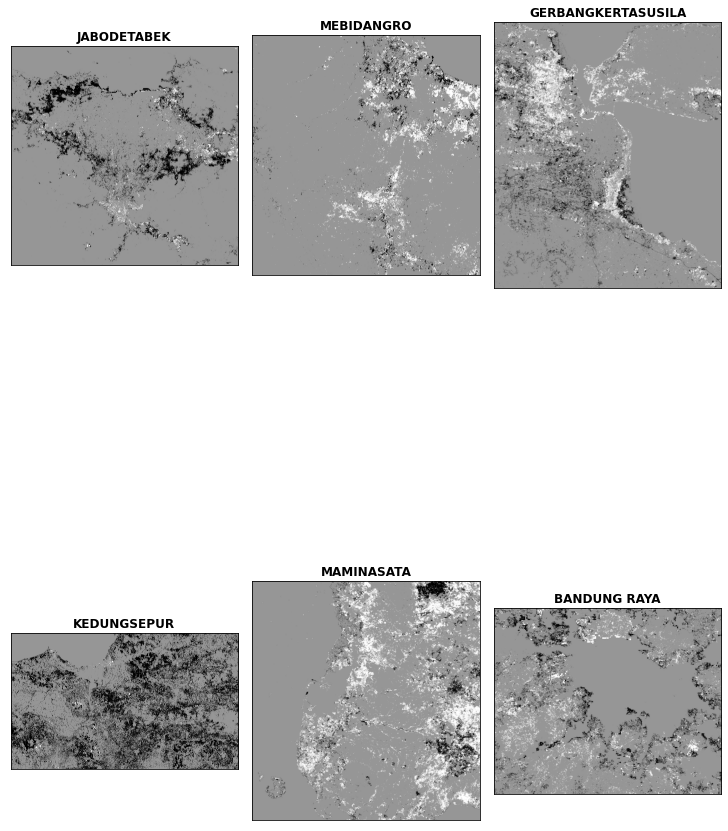

In [ ]:
fig,ax=plt.subplots(2,3,constrained_layout=True,figsize=(10,15))
change_jabodetabek=rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/fig4_changes_jabodetabek.tif','r')
show(change_jabodetabek,cmap='Greys_r',ax=ax[0,0],title='JABODETABEK')
change_mebidangro=rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/fig4_changes_mebidangro.tif','r')
show(change_mebidangro,cmap='Greys_r',ax=ax[0,1],title='MEBIDANGRO')
change_gerbangkertasusila=rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/fig4_changes_gerbangkertasusila.tif','r')
show(change_gerbangkertasusila,cmap='Greys_r',ax=ax[0,2],title='GERBANGKERTASUSILA')
change_kedungsepur=rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/fig4_changes_kedungsepur.tif','r')
show(change_kedungsepur,cmap='Greys_r',ax=ax[1,0],title='KEDUNGSEPUR')
change_maminasata=rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/fig4_changes_maminasata.tif','r')
show(change_maminasata,cmap='Greys_r',ax=ax[1,1],title='MAMINASATA')
change_bandungraya=rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/fig4_changes_bandungraya.tif','r')
show(change_bandungraya,cmap='Greys_r',ax=ax[1,2],title='BANDUNG RAYA')
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,2].set_xticks([])
ax[0,2].set_yticks([])
ax[1,0].set_xticks([])
ax[1,0].set_yticks([])
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,2].set_xticks([])
ax[1,2].set_yticks([])

In [ ]:
fig.savefig('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/fig4_compiled_changes.png')

In [ ]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 15.5MB/s 
     |████████████████████████████████| 14.7MB 306kB/s 


In [ ]:
!pip install rasterstats
from rasterio.mask import mask
compile_ubah=pd.DataFrame()
for i in ['jabodetabek','mebidangro','gerbangkertasusila','kedungsepur','maminasata','bandungraya']:
  lokus=gpd.read_file('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/'+i+'.shp')[['geometry','idkab','nmkab']]
  changes=rasterio.open('/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/oke/fig4_changes_'+i+'.tif','r')
  lokus=lokus.to_crs(changes.crs.data)
  lokus['metro']=i
  array = changes.read(1)
  affine = changes.transform
  #increase
  zs=zonal_stats(lokus, np.where(array==-1,array,0), affine=affine, stats=['sum'])
  increase=pd.DataFrame(zs).rename(columns={'sum':'increase'})
  lokus=lokus.merge(increase,left_index=True,right_index=True)
  #decrease
  zs=zonal_stats(lokus, np.where(array==1,array,0), affine=affine, stats=['sum'])
  decrease=pd.DataFrame(zs).rename(columns={'sum':'decrease'})
  lokus=lokus.merge(decrease,left_index=True,right_index=True)
  #sum
  zs=zonal_stats(lokus, array, affine=affine, stats=['count'])
  counting=pd.DataFrame(zs).rename(columns={'sum':'count_grid'})
  lokus=lokus.merge(counting,left_index=True,right_index=True)
  compile_ubah=lokus.append(compile_ubah)

     |████████████████████████████████| 92kB 3.5MB/s 
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114196 sha256=ccc03af98424ce07623dc5dddf11feeffeb2c05c265ad42ae27a0939bc8f127c
  Stored in directory: /root/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
Successfully built simplejson


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


NameError: ignored

In [ ]:
compile_ubah[['idkab','nmkab','metro','increase','decrease','count']].to_excel(
    '/content/gdrive/My Drive/Urban_monitoring/Urban_/GHSL_/GHSL_rev/zonal_stats.xlsx')

In [ ]:
d

In [ ]:
jabodetabek=jabodetabek.to_crs(change_jabodetabek.crs.data)
array = change_jabodetabek.read(1)
affine = change_jabodetabek.transform

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:

from rasterstats import zonal_stats

     |████████████████████████████████| 92kB 2.9MB/s 
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114208 sha256=027a1501b4308451b9180c5bdc2c5b1d7665005536d2d8f6bff72af0daebea60
  Stored in directory: /root/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
Successfully built simplejson


In [ ]:
zs=zonal_stats(jabodetabek, np.where(array==-1,array,0), affine=affine, stats=['sum'])


/usr/local/lib/python3.6/dist-packages/rasterstats/io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [ ]:
zs[0]['sum']

-3623.0

In [ ]:
pd.DataFrame(zs)

sum
0    -3623.0
1   -11744.0
2     -196.0
3    -1757.0
4    -9357.0
5  -198782.0
6  -208897.0
7    -6542.0
8   -16923.0
9   -37487.0
10 -266607.0
11  -11460.0
12  -15185.0

In [ ]:
jabodetabek['increase']=''
jabodetabek['decrease']=''
for index, row in jabodetabek.iterrows():
  row=gpd.GeoDataFrame(row,geometry='geometry')
  zs=zonal_stats(row, np.where(array==-1,array,0), affine=affine, stats=['sum'])
  jabodetabek.at[index,'increase']=zs[0]['sum']

ValueError: ignored

In [ ]:
?gpd.GeoDataFrame

In [ ]:
data_np.array(dataset_2015.read(1))-np.array(dataset_2019.read(1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
dt_2019_.shape

(12036411, 1)

In [ ]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()